In [1]:
import scanpy as sc
import anndata as ad
import numpy as np

/home/leoh/miniforge3/envs/tacco/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:639: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


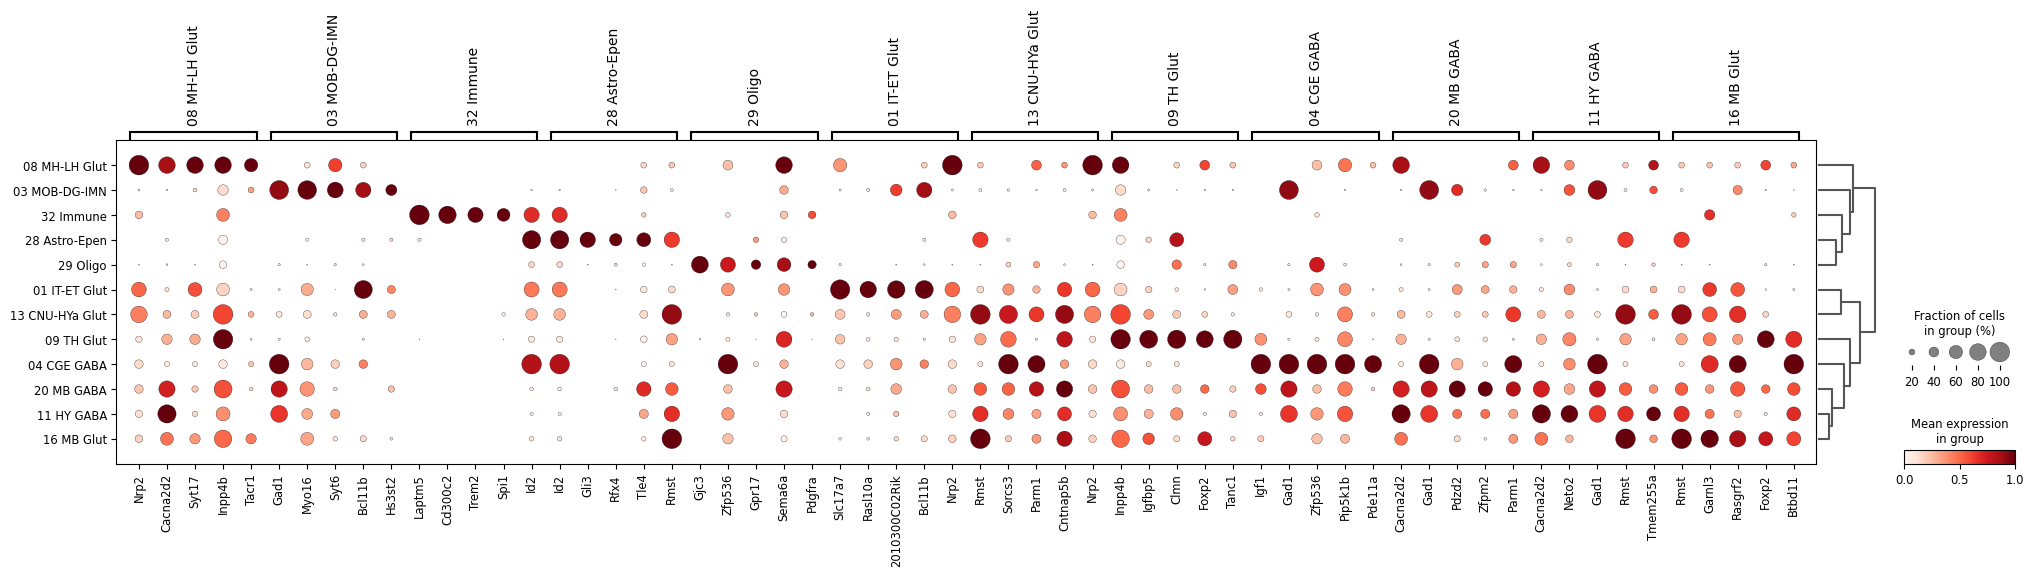

In [2]:
adata_sc = sc.read("adata_sc.h5ad")
adata_sc.X = adata_sc.layers["normalized"]
ct_cell_counts = adata_sc.obs["cell_type"].value_counts()
cts = ct_cell_counts.loc[ct_cell_counts > 1].index
adata_sc = adata_sc[adata_sc.obs['cell_type'].isin(cts)]
sc.tl.rank_genes_groups(adata_sc, groupby='cell_type', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(adata_sc, n_genes=5, standard_scale='var')

In [3]:
adata_sp = sc.read("adata_sp_annotated.h5ad")
adata_sp.X = adata_sp.layers["raw"]

sc.pp.log1p(adata_sp)

cell_types = adata_sp.obsm["pred_cell_type"].columns
highest_score = np.argmax(adata_sp.obsm["pred_cell_type"], axis=1)
adata_sp.obs["cat_celltype"] = cell_types[highest_score]

sc.tl.pca(adata_sp)
sc.pp.neighbors(adata_sp)
sc.tl.leiden(adata_sp, resolution=0.5)
sc.tl.umap(adata_sp)

/tmp/ipykernel_190123/3824628962.py:12: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_sp, resolution=0.5)


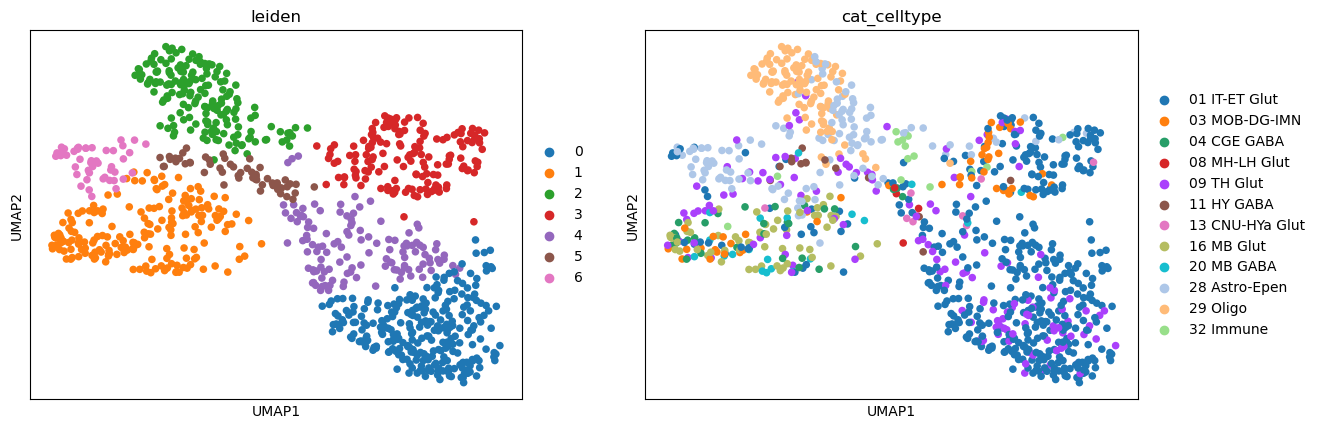

In [4]:
sc.pl.umap(adata_sp, color=["leiden", "cat_celltype"])

In [5]:
markers = {
    '01 IT-ET Glut': ['Slc17a7', 'Rasl10a', '2010300C02Rik'],
    '03 MOB-DG-IMN': ['Myo16'],
    '04 CGE GABA': ['Igf1', 'Zfp536', 'Pde11a'],
    '08 MH-LH Glut': ['Nrp2', 'Syt17'],
    '09 TH Glut': ['Igfbp5', 'Tanc1'],
    '11 HY GABA': ['Cacna2d2', 'Neto2'],
    #'13 CNU-HYa Glut': [],
    '16 MB Glut': ['Rmst', 'Garnl3'],
    '20 MB GABA': ['Pdzd2', 'Zfpm2'],
    '28 Astro-Epen': ['Id2', 'Gli3', 'Rfx4', 'Tle4', 'Rmst'],
    '29 Oligo': ['Gjc3', 'Gpr17'],
    '32 Immune': ['Laptm5', 'Cd300c2', 'Trem2', 'Spi1'],
}

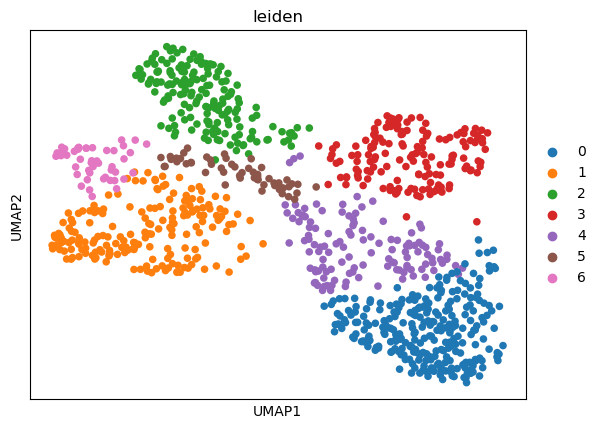

01 IT-ET Glut


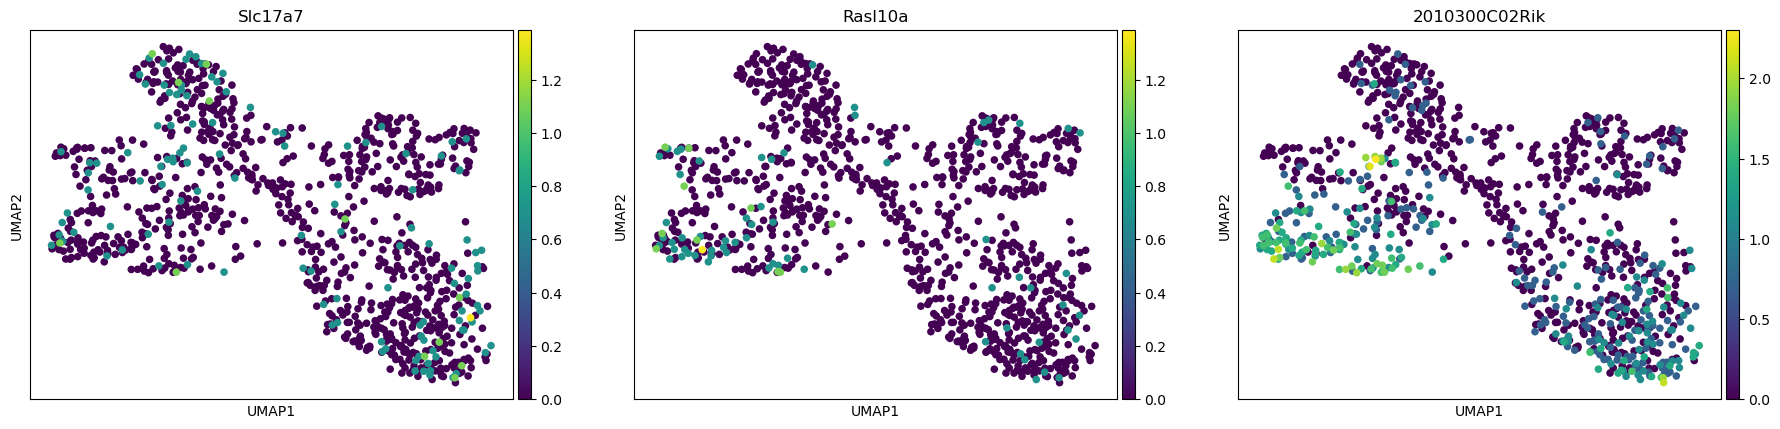

03 MOB-DG-IMN


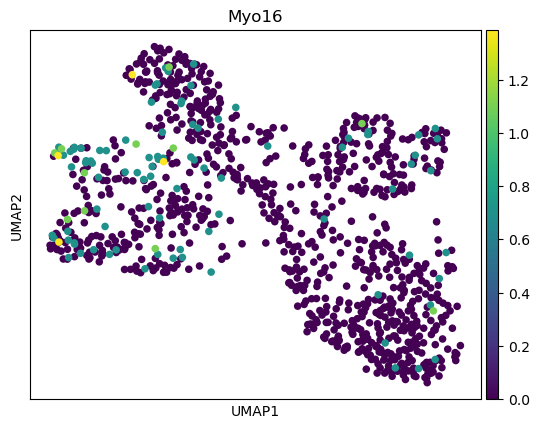

04 CGE GABA


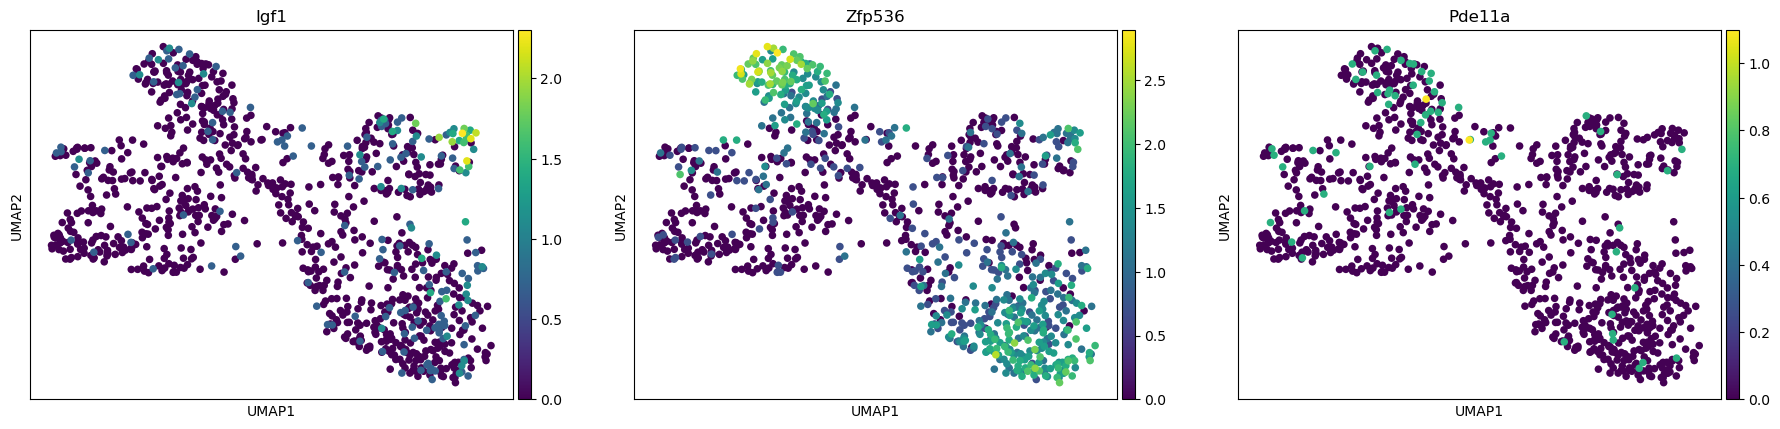

08 MH-LH Glut


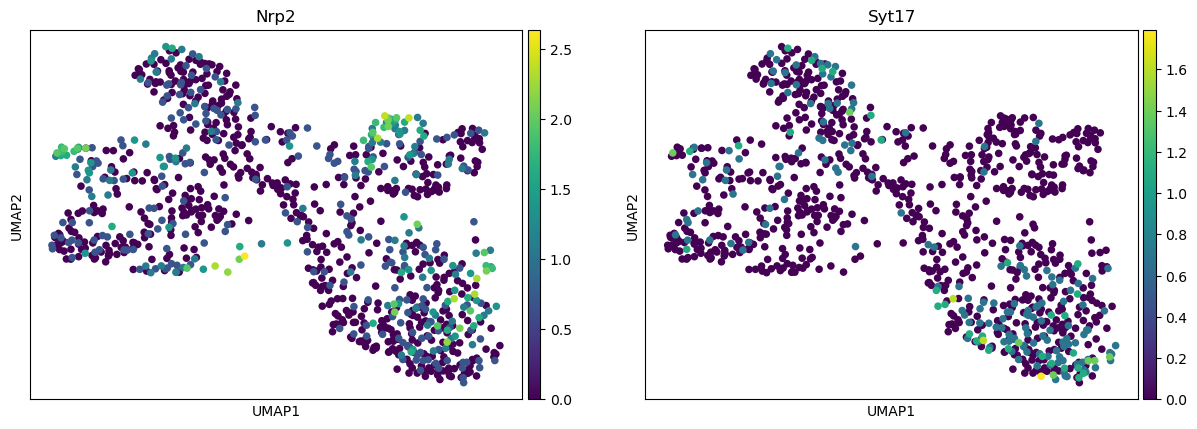

09 TH Glut


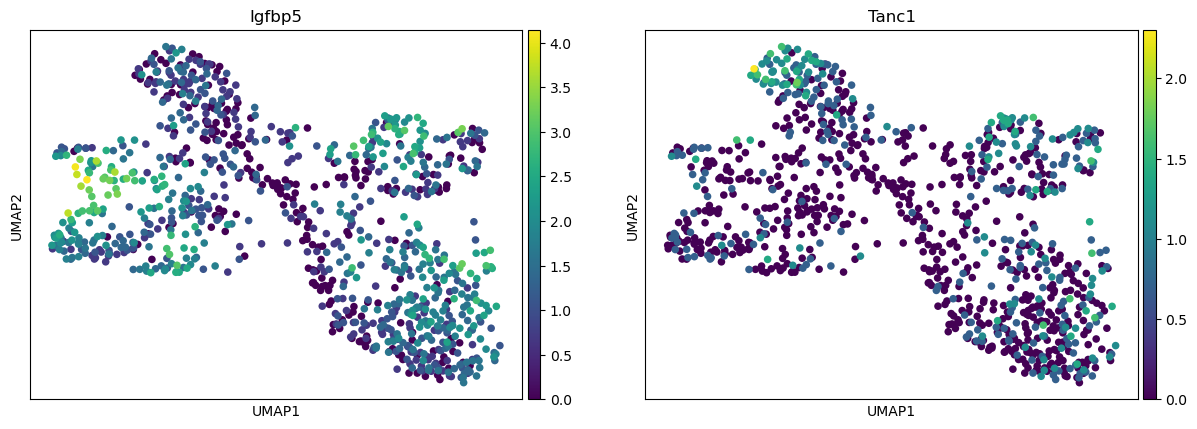

11 HY GABA


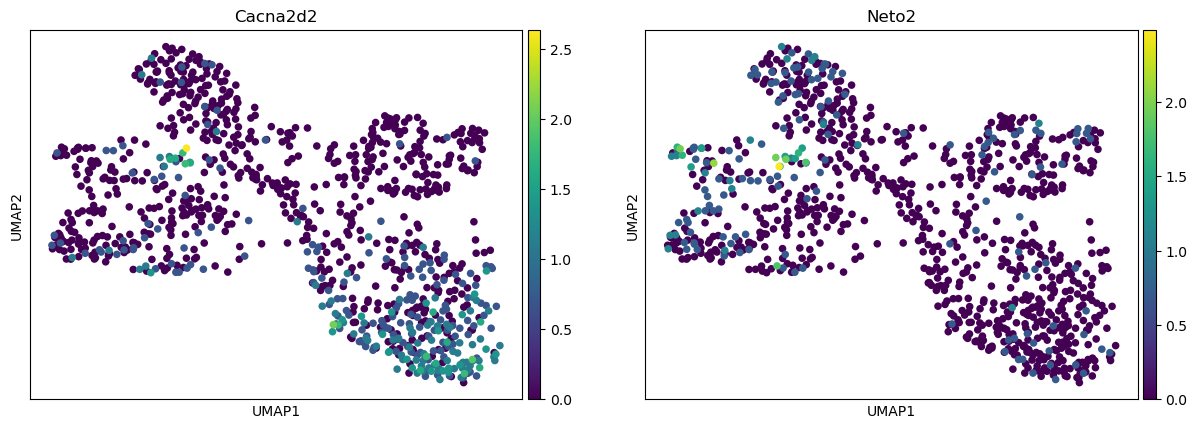

16 MB Glut


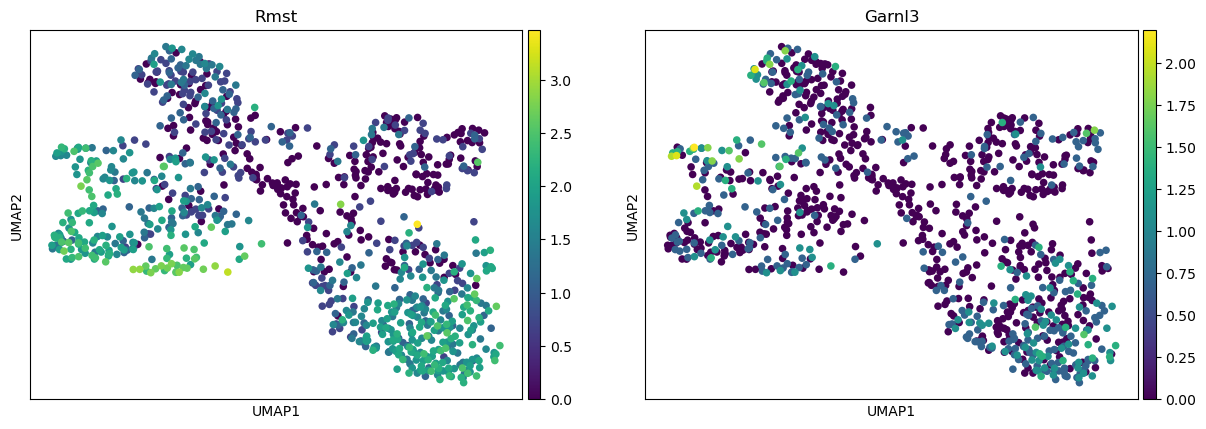

20 MB GABA


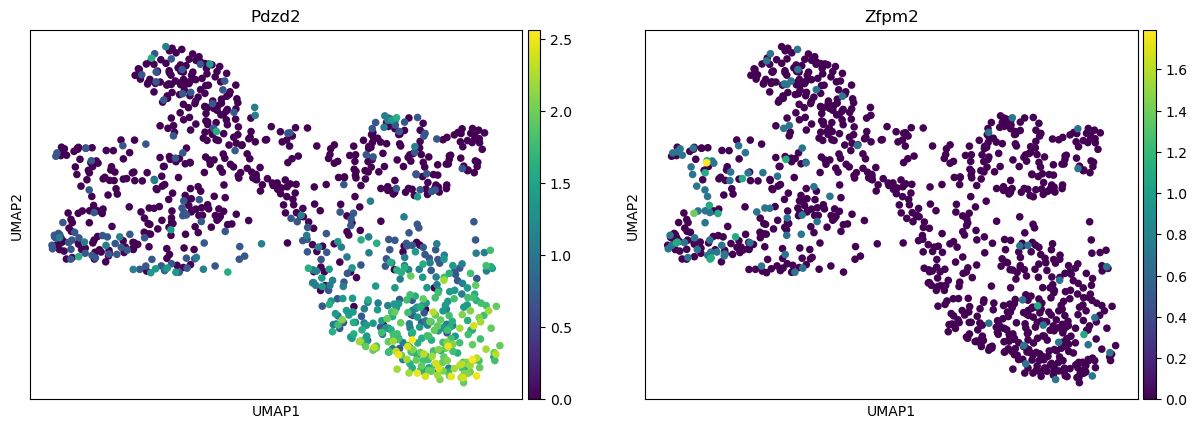

28 Astro-Epen


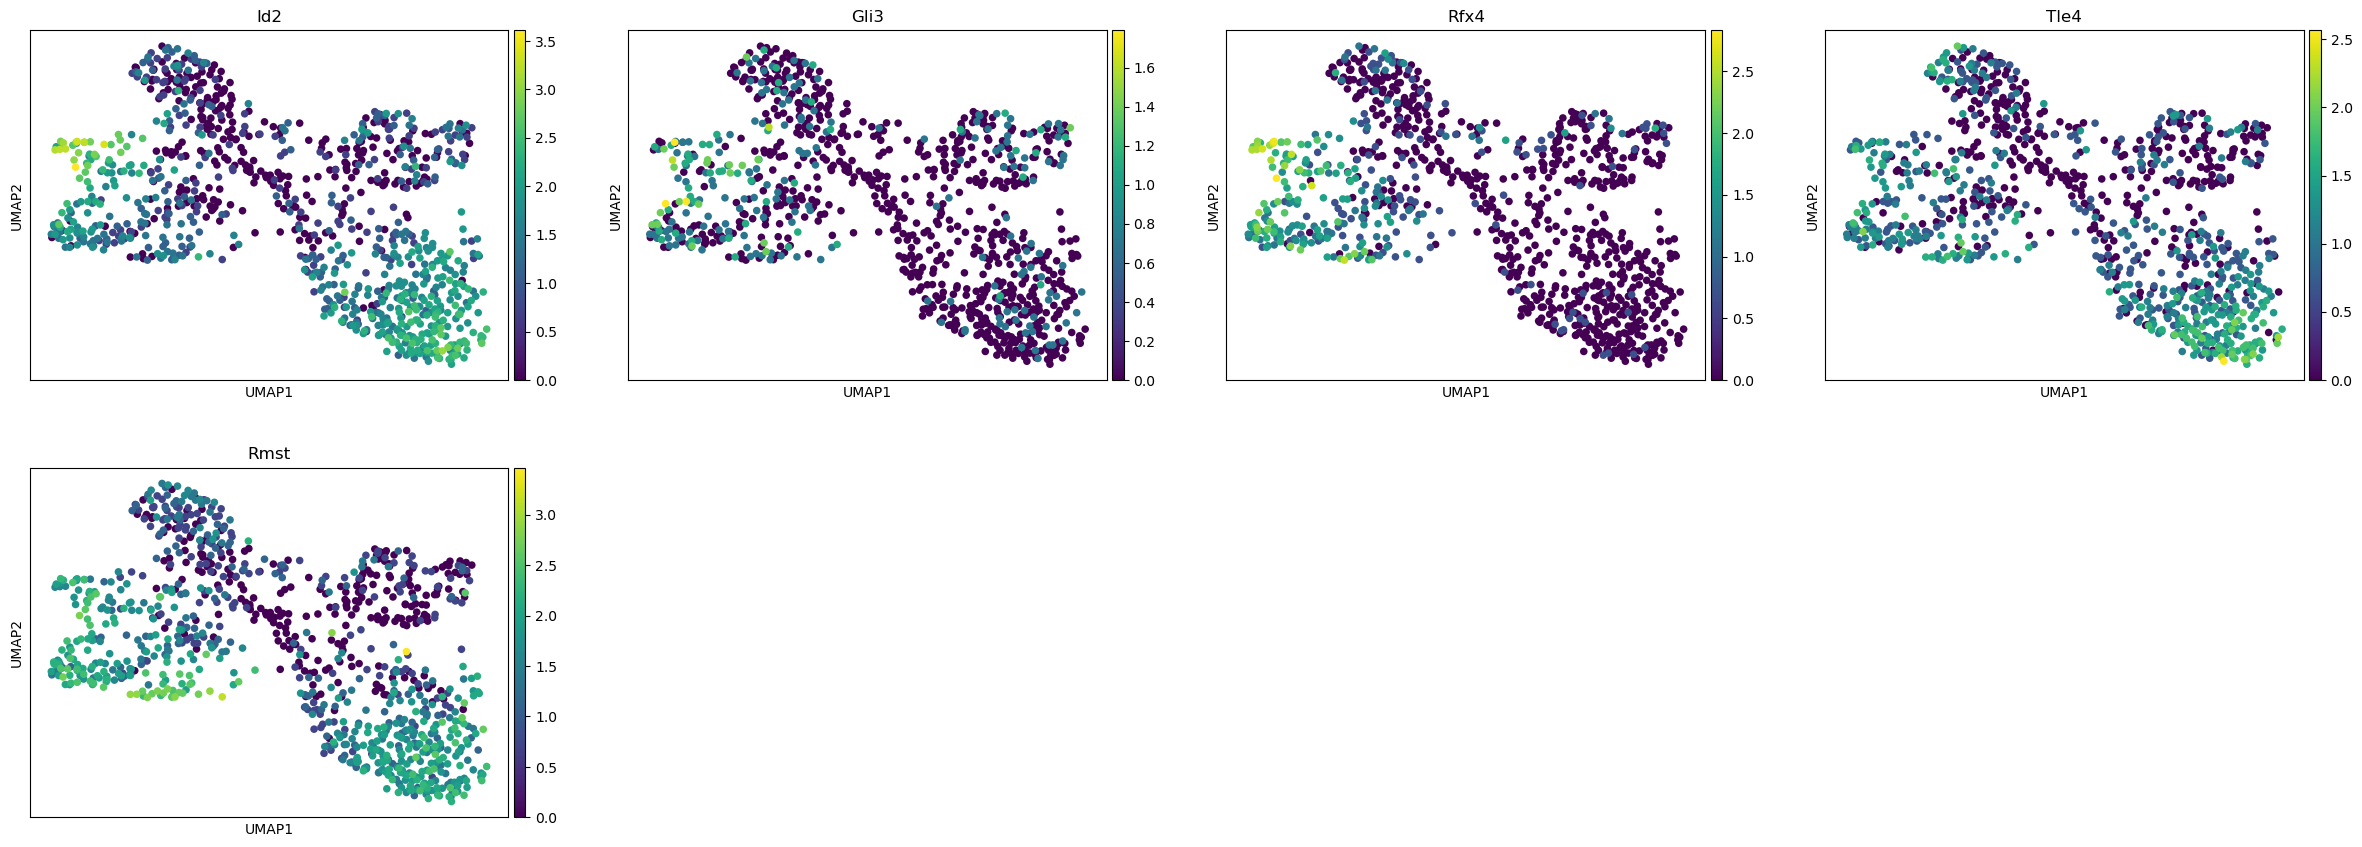

29 Oligo


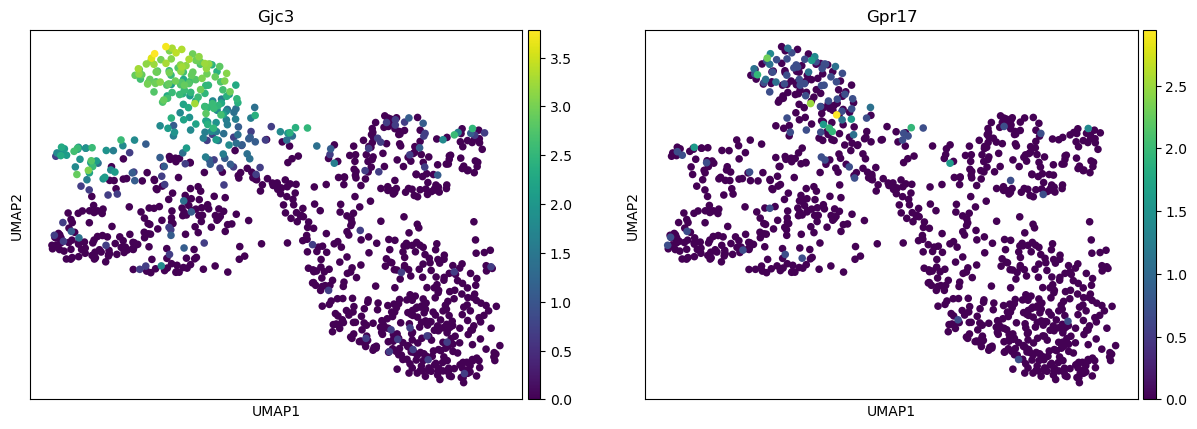

32 Immune


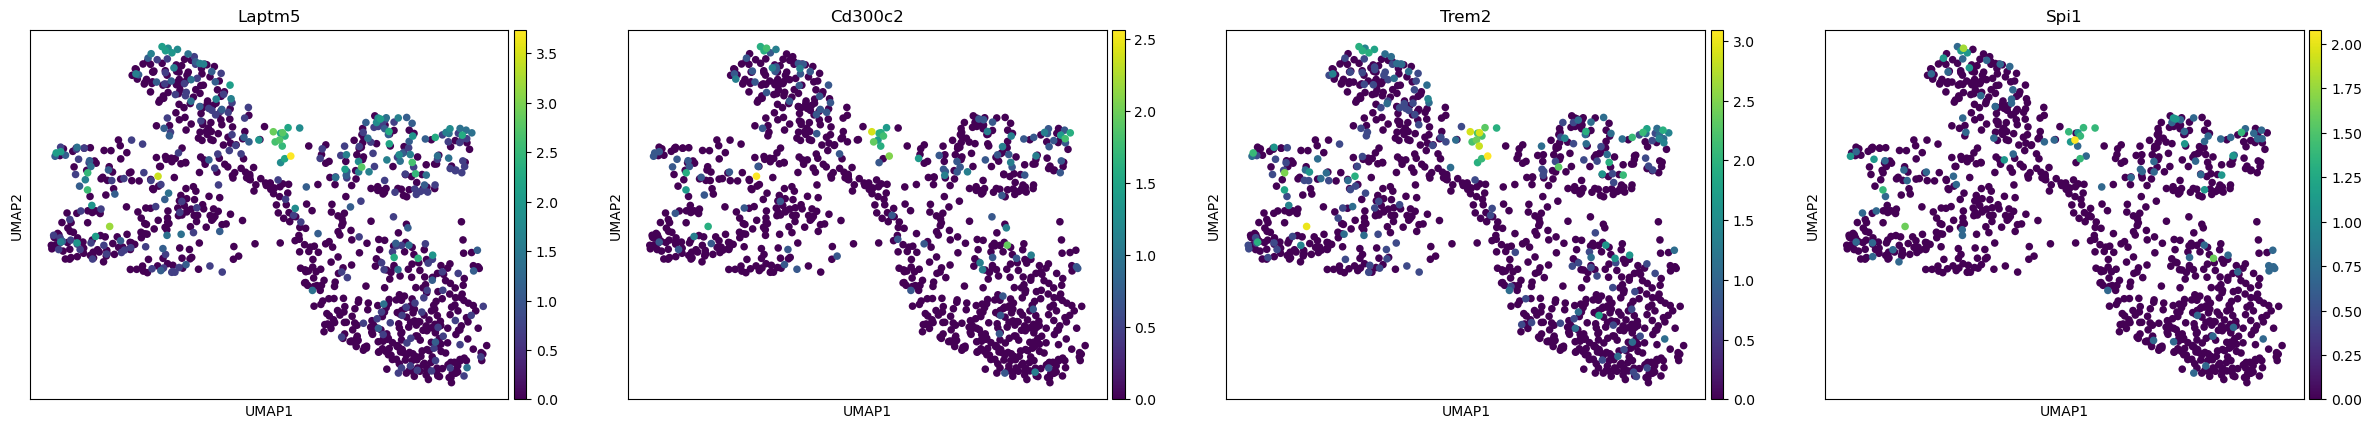

In [6]:
sc.pl.umap(adata_sp, color="leiden")
for ct, marks in markers.items():
    print(ct)
    sc.pl.umap(adata_sp, color=marks)